## Assignment 5: Multi-layer Neural Network on Synthetic Data（20 marks）

**Task Description**

Complete the code in the blanks to accomplish the following tasks:
   - **Dataset Loading and Plotting**: Split the given dataset into features and labels, and visualize the dataset.
   - **Forward Propagation**: Compute the output value for each layer.
   - **Backward Propagation**: Compute the local gradient of each layer and optimize the weights.

**Model Structure**
   - **Input layer**: Number of feature (3 nodes)
   - **Hidden layer**: 1 layer with 2 nodes
   - **Output layer**: 1 nodes
   - **Activation Function**: Sigmoid function
   - **Loss function**: Cross-entropy

## Task 1. Dataset Loading and Plotting (3 marks)

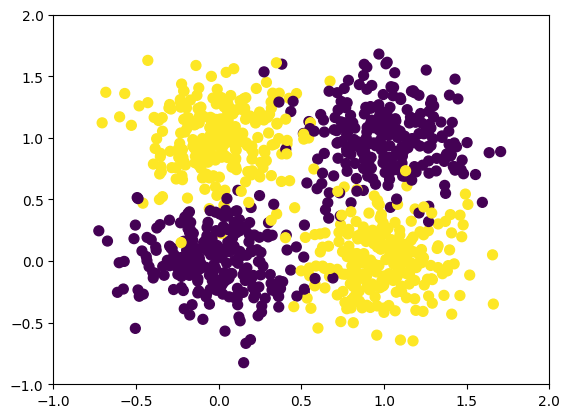

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("Syn_data_2D.csv")
#Each data should contain 3 features (Bias, x, y)
data_2D = np.hstack((np.ones((len(data_df), 1)), data_df[["Feature_1", "Feature_2"]].values))           #----------------------------------------1 marks
y = data_df["Label"].values.reshape(-1, 1)                 #----------------------------------------1 marks

fig = plt.figure()
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.scatter(data_2D[:, 1], data_2D[:, 2], s=50, c=y)         #----------------------------------------1 marks

## Task 2. Training (17 marks)

In [4]:
theta_1 = np.array([[1.0, 0.0],
                    [1.0, 0.0],
                    [1.0, 0.0]])

theta_2 = np.array([1.0, 0.0]).reshape(2,1)
alpha = 0.0001

for epoch in range(5000):
    
    #Forward Propagation
    
    z_1 = data_2D @ theta_1        #----------------------------------------1 marks
    a_1 = 1 / (1 + np.exp(-z_1))        #----------------------------------------1 marks
    z_2 = a_1 @ theta_2        #----------------------------------------1 marks
    a_2 = 1 / (1 + np.exp(-z_2))        #----------------------------------------1 marks
    y_pred = a_2


    #Backward Propagation
    
    gradientlayer2_1 = ((1 - y) / (1 - a_2) - y / a_2)        #----------------------------------------1 marks
    gradientlayer2_2 = a_2 * (1 - a_2)        #----------------------------------------1 marks


    #Gradient for theta 2
    gradientlayer2_full = a_1.T @ (gradientlayer2_1 * gradientlayer2_2)        #----------------------------------------1 marks

    #Point to the activation layer before theta 2
    gradientlayer1_1 = (a_2 - y) @ theta_2.T        #----------------------------------------1 marks
    gradientlayer1_2 = a_1 * (1 - a_1)        #----------------------------------------1 marks

    #Gradient for theta 1
    gradientlayer1_full = data_2D.T @ (gradientlayer1_1 * gradientlayer1_2)        #----------------------------------------2 marks

    
    #Gradient Descent
    theta_2 = alpha * gradientlayer2_full        #----------------------------------------1 marks
    theta_1 = alpha * gradientlayer1_full        #----------------------------------------2 marks


#Apply the updated weights
z_1 = data_2D @ theta_1
a_1 = 1 / (1 + np.exp(-z_1))
z_2 = a_1 @ theta_2
a_2 = 1 / (1 + np.exp(-z_2))
y_pred = a_2

y_pred_l = []
for i in y_pred:
    if(i > 0.5):             #----------------------------------------1 marks
        y_pred_l.append(1)
    else:
        y_pred_l.append(0)

count = 0
for i in (np.array(y_pred_l)-y.reshape(-1)):
    if(i == 0):             #----------------------------------------1 marks
        count+=1

accuracy = count / len(y)           #----------------------------------------1 marks
print("Accuracy: " + str(accuracy))

Accuracy: 0.5
